# Install dependencies

* IMPORTANT: you only need to run this one time, when you first spin up your docker notebook server
* IMPORTANT: you need to restart the kernel after you run this
* TODO: these deps should be eventually put into a dockerfile

* INFO: read more about [what the hell is pip](https://pip.pypa.io/en/stable/) and [why installing dependencies via pip in a notebook is a stupid idea, but OK since we are prototyping here](https://towardsdev.com/pip-install-from-jupyter-notebook-485c218b50b)

In [ ]:
!pip install pandas
!pip install datasets

# Import libraries

also setup the data directory

In [1]:
import os
import re
import glob
import shutil
import string
import pathlib

# set the data directory
data_dir = os.path.abspath(os.path.join(os.getcwd(),'..','data'))

#give matplotlib a folder to save its configs
os.environ['MPLCONFIGDIR'] = os.path.join(data_dir,'plt_configs')
import matplotlib.pyplot as plt

#give huggingface a folder to save its stuff in too
#you only need this if you are using a huggingface dataset
os.environ['HF_HOME'] = os.path.join(data_dir,'hf_cache')
import datasets

import PIL
import PIL.Image

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.layers import TextVectorization

In [18]:
# setup directories, create them if they do not exist within data folder

# We want our data directory to contain two folders, one for each class we are predicting ("headshots" aka normalish photos of normalish people (I guess) or "mugshots")

faces_dir = os.path.join(data_dir,'faces')
if not os.path.exists(faces_dir):
    os.makedirs(faces_dir)
    
headshots_dir = os.path.join(data_dir,'faces','headshots')
if not os.path.exists(headshots_dir):
    os.makedirs(headshots_dir)
    
mugshots_dir = os.path.join(data_dir,'faces','mugshots')
if not os.path.exists(mugshots_dir):
    os.makedirs(mugshots_dir)

# Download the data, part 1 "control group" faces from huggingface and inspect the data

* [huggingface datasets quickstart](https://huggingface.co/docs/datasets/quickstart)
* [nielsr/CelebA-faces](https://huggingface.co/datasets/nielsr/CelebA-faces)
* [Know your dataset](https://huggingface.co/docs/datasets/access)

In [2]:
from datasets import load_dataset

dataset = load_dataset("nielsr/CelebA-faces")

Using custom data configuration nielsr--CelebA-faces-ffaff57f221b8a22
Found cached dataset parquet (/tf/data/hf_cache/datasets/nielsr___parquet/nielsr--CelebA-faces-ffaff57f221b8a22/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# TODO change this, it currenty saves the first 9 images into a folder, this is for convenience later so we can setup 
for i in range(9):
    dataset['train'][i]['image'].save(os.path.join(headshots_dir,str(i)+'.jpg'))

In [20]:
image_count = len(list(pathlib.Path(headshots_dir).glob('*.jpg')))
print(image_count)

9


(178, 218)


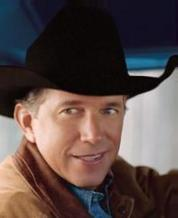

In [27]:
headshots = list(pathlib.Path(headshots_dir).glob('*.jpg'))
print(PIL.Image.open(str(headshots[0])).size)
PIL.Image.open(str(headshots[0]))


# load the mugshat data from the '/data' folder
* [load and preprocess images](https://www.tensorflow.org/tutorials/load_data/images)

In [25]:
image_count = len(list(pathlib.Path(mugshots_dir).glob('*.jpg')))
print(image_count)

9


(480, 600)


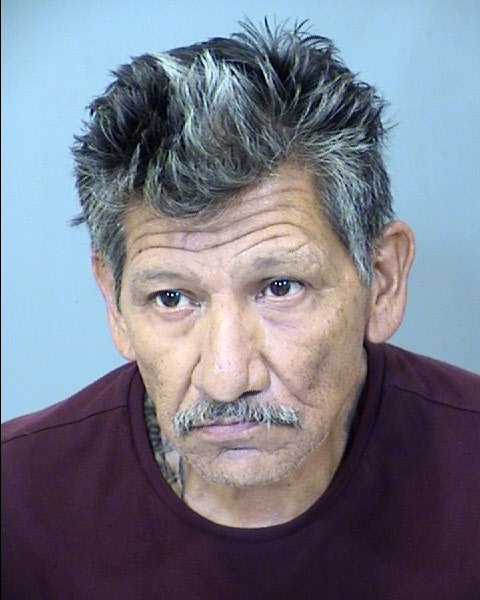

In [28]:
mugshots = list(pathlib.Path(mugshots_dir).glob('*.jpg'))
print(PIL.Image.open(str(mugshots[0])).size)
PIL.Image.open(str(mugshots[0]))

# Setup Training Set

In [30]:
batch_size = 2 #TODO Change this to something more reasonable, try 32 to start
img_height = 160
img_width = 160

train_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(faces_dir),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(faces_dir),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18 files belonging to 2 classes.
Using 15 files for training.
Found 18 files belonging to 2 classes.
Using 3 files for validation.


# [Visualize Data](https://www.tensorflow.org/tutorials/load_data/images#visualize_the_data)

In [ ]:
# TODO add code here

# [Standardize and Fit](https://www.tensorflow.org/tutorials/load_data/images#standardize_the_data)

# Save model and test prediction

In [ ]:
# TODO add code here